In [152]:
import glob
import numpy as np
import random
import librosa
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.1.0


In [153]:
class_names = os.listdir("../feature/feature_mfcc/")
class_names.sort()

print(class_names)

x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_mfcc/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../feature/feature_mfcc/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung', '2017019770016_parkjongae', '2017019770017_hansohee', '2017019770018_janggyeoul', '2017019770019_leewooju', '2017019770020_nomyungok', '2017019770021_heoyoonjung', '2017019770022_heojaemin', '2017019770023_kimsoyung', 

In [154]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

x_train: (235, 469, 12)
y_train: (235,)


In [155]:


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [156]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [157]:
print("x_train:", x_train.shape)
print("y_train:", y_train_encoded.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val_encoded.shape)

x_train: (188, 469, 12)
y_train: (188, 47)
x_val: (47, 469, 12)
y_val: (47, 47)


In [158]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [159]:
#print(x_train.shape[1])
#print(x_train.shape[2])

n_features = x_train.shape[1]
max_length = x_train.shape[2]
input_shape = (n_features, max_length)
dropout = 0.25
n_classes = len(class_names)
n_epochs = 50
batch_size = 16

In [160]:
model = Sequential()

model.add(LSTM(256, return_sequences=True, input_shape=input_shape,dropout=dropout))
model.add(Dropout(dropout))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(dropout))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(n_classes, activation='softmax'))

In [161]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_104 (LSTM)              (None, 469, 256)          275456    
_________________________________________________________________
dropout_85 (Dropout)         (None, 469, 256)          0         
_________________________________________________________________
lstm_105 (LSTM)              (None, 469, 128)          197120    
_________________________________________________________________
dropout_86 (Dropout)         (None, 469, 128)          0         
_________________________________________________________________
lstm_106 (LSTM)              (None, 469, 64)           49408     
_________________________________________________________________
dropout_87 (Dropout)         (None, 469, 64)           0         
_________________________________________________________________
lstm_107 (LSTM)              (None, 469, 64)         

In [162]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

In [163]:
history = model.fit(x_train, y_train_encoded, 
                    batch_size=batch_size, epochs=n_epochs, verbose=2,
                    validation_data=(x_val, y_val_encoded))

Train on 188 samples, validate on 47 samples
Epoch 1/50
188/188 - 4s - loss: 3.8447 - accuracy: 0.0319 - val_loss: 3.8405 - val_accuracy: 0.0426
Epoch 2/50
188/188 - 1s - loss: 3.8267 - accuracy: 0.0479 - val_loss: 3.8132 - val_accuracy: 0.0638
Epoch 3/50
188/188 - 1s - loss: 3.7880 - accuracy: 0.0532 - val_loss: 3.7831 - val_accuracy: 0.0638
Epoch 4/50
188/188 - 1s - loss: 3.7477 - accuracy: 0.0851 - val_loss: 3.7440 - val_accuracy: 0.0638
Epoch 5/50
188/188 - 1s - loss: 3.7000 - accuracy: 0.0798 - val_loss: 3.6934 - val_accuracy: 0.0851
Epoch 6/50
188/188 - 1s - loss: 3.6471 - accuracy: 0.1170 - val_loss: 3.6324 - val_accuracy: 0.0851
Epoch 7/50
188/188 - 1s - loss: 3.5550 - accuracy: 0.1436 - val_loss: 3.5600 - val_accuracy: 0.1489
Epoch 8/50
188/188 - 1s - loss: 3.4572 - accuracy: 0.2128 - val_loss: 3.4710 - val_accuracy: 0.1915
Epoch 9/50
188/188 - 1s - loss: 3.3491 - accuracy: 0.2287 - val_loss: 3.3703 - val_accuracy: 0.2340
Epoch 10/50
188/188 - 1s - loss: 3.2327 - accuracy: 0.2

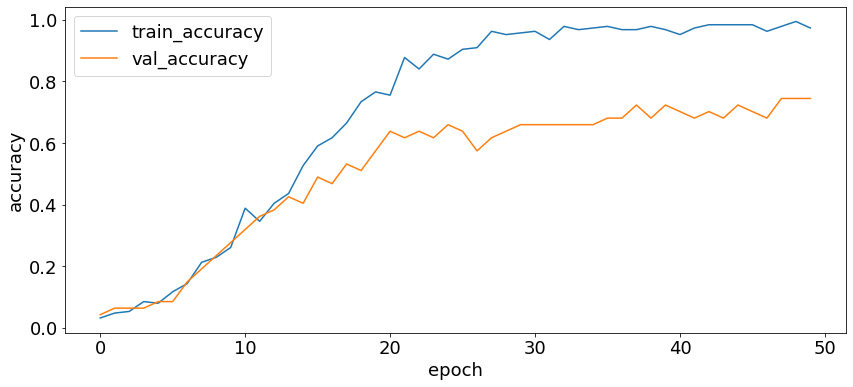

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [165]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model2 = Sequential()
model2.add(LSTM(
      256,
      input_shape=input_shape,
      return_sequences=True
))
model2.add(Dropout(dropout))
model2.add(LSTM(512, return_sequences=True))
model2.add(Dropout(dropout))
model2.add(LSTM(256))
model2.add(Dense(256))
model2.add(Dropout(dropout))
model2.add(Dense(n_classes))
model2.add(Activation('softmax'))
#odel2.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [166]:
model2.compile(loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"], optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False))

In [167]:
model2.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_108 (LSTM)              (None, 469, 256)          275456    
_________________________________________________________________
dropout_90 (Dropout)         (None, 469, 256)          0         
_________________________________________________________________
lstm_109 (LSTM)              (None, 469, 512)          1574912   
_________________________________________________________________
dropout_91 (Dropout)         (None, 469, 512)          0         
_________________________________________________________________
lstm_110 (LSTM)              (None, 256)               787456    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_92 (Dropout)         (None, 256)             

In [168]:
history2 = model2.fit(x_train, y_train_encoded, 
                    batch_size=batch_size, epochs=n_epochs, verbose=2,
                    validation_data=(x_val, y_val_encoded))

Train on 188 samples, validate on 47 samples
Epoch 1/50
188/188 - 4s - loss: 3.8656 - accuracy: 0.0532 - val_loss: 3.8324 - val_accuracy: 0.0426
Epoch 2/50
188/188 - 1s - loss: 3.8095 - accuracy: 0.0479 - val_loss: 3.8169 - val_accuracy: 0.0638
Epoch 3/50
188/188 - 1s - loss: 3.7530 - accuracy: 0.1330 - val_loss: 3.8040 - val_accuracy: 0.0638
Epoch 4/50
188/188 - 1s - loss: 3.7095 - accuracy: 0.1702 - val_loss: 3.7898 - val_accuracy: 0.0851
Epoch 5/50
188/188 - 1s - loss: 3.6594 - accuracy: 0.2606 - val_loss: 3.7780 - val_accuracy: 0.0851
Epoch 6/50
188/188 - 1s - loss: 3.6164 - accuracy: 0.3351 - val_loss: 3.7633 - val_accuracy: 0.0851
Epoch 7/50
188/188 - 1s - loss: 3.5648 - accuracy: 0.4574 - val_loss: 3.7489 - val_accuracy: 0.0638
Epoch 8/50
188/188 - 1s - loss: 3.5200 - accuracy: 0.4947 - val_loss: 3.7347 - val_accuracy: 0.1064
Epoch 9/50
188/188 - 1s - loss: 3.4889 - accuracy: 0.5904 - val_loss: 3.7225 - val_accuracy: 0.1064
Epoch 10/50
188/188 - 1s - loss: 3.4379 - accuracy: 0.6

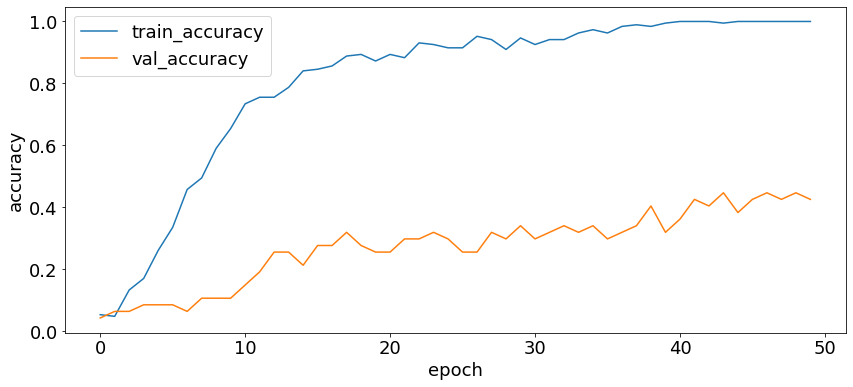

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()